# Βαθιά μάθηση στο CIFAR-100

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [40]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [42]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

In [43]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με ένα μοναδικό ξεχωριστό υποσύνολο του CIFAR-100
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό της ομάδας σας.

In [44]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 52

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [45]:
# select the number of classes
cifar100_classes_url = select_classes_number(80)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [46]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [47]:
# print our classes
print(our_classes)

['apple', ' aquarium_fish', ' baby', ' bear', ' bed', ' beetle', ' bicycle', ' bottle', ' bowl', ' boy', ' bus', ' butterfly', ' camel', ' castle', ' caterpillar', ' cattle', ' chair', ' chimpanzee', ' clock', ' couch', ' crab', ' crocodile', ' cup', ' dinosaur', ' dolphin', ' elephant', ' flatfish', ' forest', ' girl', ' hamster', ' house', ' kangaroo', ' keyboard', ' lamp', ' lawn_mower', ' leopard', ' lion', ' lobster', ' maple_tree', ' motorcycle', ' mouse', ' oak_tree', ' otter', ' palm_tree', ' pear', ' pickup_truck', ' pine_tree', ' plain', ' plate', ' poppy', ' porcupine', ' possum', ' rabbit', ' raccoon', ' ray', ' road', ' rocket', ' rose', ' sea', ' seal', ' skyscraper', ' snail', ' snake', ' spider', ' squirrel', ' sunflower', ' sweet_pepper', ' table', ' tank', ' television', ' tiger', ' tractor', ' train', ' tulip', ' turtle', ' wardrobe', ' whale', ' willow_tree', ' wolf', ' woman']


In [48]:
CLASSES_NUM=len(our_classes)

In [49]:
print(x_train_ds[1].shape)

(32, 32, 3)


6000
Train: X=(34000, 32, 32, 3), y=(34000, 1)
Validation: X=(6000, 32, 32, 3), y=(6000, 1)
Test: X=(8000, 32, 32, 3), y=(8000, 1)


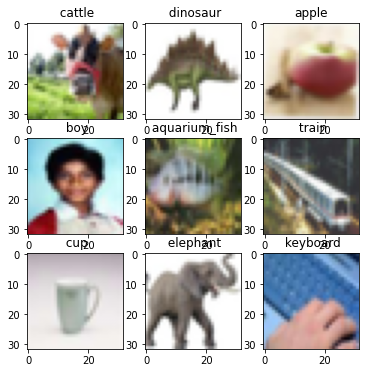

In [50]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

print(len(x_val))

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [51]:
# find unique labels using a dict -- key: real label, value: transformed label
labels = {}
for i,label in enumerate(np.unique(y_train)):
    labels[label] = i

print(labels)

# transform y sets
y_train = [labels[int(label)] for label in y_train]
y_val = [labels[int(label)] for label in y_val]
y_test = [labels[int(label)] for label in y_test]

{0: 0, 1: 1, 2: 2, 3: 3, 5: 4, 7: 5, 8: 6, 9: 7, 10: 8, 11: 9, 13: 10, 14: 11, 15: 12, 17: 13, 18: 14, 19: 15, 20: 16, 21: 17, 22: 18, 25: 19, 26: 20, 27: 21, 28: 22, 29: 23, 30: 24, 31: 25, 32: 26, 33: 27, 35: 28, 36: 29, 37: 30, 38: 31, 39: 32, 40: 33, 41: 34, 42: 35, 43: 36, 45: 37, 47: 38, 48: 39, 50: 40, 52: 41, 55: 42, 56: 43, 57: 44, 58: 45, 59: 46, 60: 47, 61: 48, 62: 49, 63: 50, 64: 51, 65: 52, 66: 53, 67: 54, 68: 55, 69: 56, 70: 57, 71: 58, 72: 59, 76: 60, 77: 61, 78: 62, 79: 63, 80: 64, 82: 65, 83: 66, 84: 67, 85: 68, 87: 69, 88: 70, 89: 71, 90: 72, 92: 73, 93: 74, 94: 75, 95: 76, 96: 77, 97: 78, 98: 79}


## Συναρτήσεις εκπαίδευσης

Θα χρησιμοποιήσουμε την ιδιότητα data prefetch του tf2:

In [52]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x, y, BATCH_SIZE, shuffle=None):
    ds = tf.data.Dataset.from_tensor_slices((x,y))
    ds = ds.shuffle(buffer_size=data_size, reshuffle_each_iteration=shuffle)
    ds = ds.repeat() 
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.5,
    horizontal_flip=True,
)
datagen.fit(x_train)

# train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
train_ds = datagen.flow(x=x_train, y=y_train, batch_size=BATCH_SIZE, shuffle=True)
validation_ds =_input_fn(x_val, y_val, BATCH_SIZE, shuffle=False) 
test_ds =_input_fn(x_test, y_test, BATCH_SIZE, shuffle=False) 

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
  early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, restore_best_weights=True)
  history = model.fit(train_ds, steps_per_epoch=len(x_train)//BATCH_SIZE, epochs=epochs, validation_data=validation_ds, validation_steps=len(x_val)//BATCH_SIZE, callbacks=[early_stop]) #len(x_val)/BATCH_SIZE , callbacks=[early_stop]
  return history

## Γραφικές παραστάσεις εκπαίδευσης και απόδοση στο σύνολο ελέγχου

In [53]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0, accuracy0 = model.evaluate(test_ds, steps=evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps=10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

## Βελτιστοποιημένα Μοντέλα Δικτύων

### Συνελικτικό δίκτυο "From Scratch"

In [60]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3, 3), activation='elu', input_shape=(32,32,3)))
  model.add(layers.Conv2D(64, (3, 3), activation='elu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='elu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(256, (3, 3), activation='elu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='elu'))
  model.add(layers.Dense(100, activation='softmax'))
  
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
batch_normalization_19 (Batc (None, 12, 12, 128)       512       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 128)        

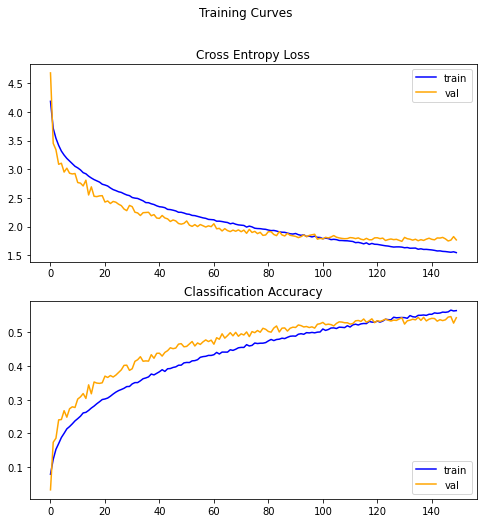


Test set evaluation metrics
30/30 [==============================] - 0s 8ms/step - loss: 1.7415 - accuracy: 0.5451
loss: 1.74
accuracy: 0.55


In [61]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 500, 30, 5)
SIMPLE_MODEL_report = model_report(SIMPLE_MODEL, SIMPLE_MODEL_history, 30)

### Μεταφορά μάθησης: ResNet

In [56]:
def init_resnet_model(summary):
    resnet_model = tf.keras.applications.resnet.ResNet50(input_shape=(img_rows, img_cols, img_channels),
                                                         include_top=False,
                                                         weights='imagenet')
    # unfreeze conv layers
    resnet_model.trainable = True
    dropout_layer = tf.keras.layers.Dropout(rate=0.7)
    dropout_layer.trainable = True
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    global_average_layer.trainable = True
    
    # add top layer for CIFAR100 classification
    prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
    model = tf.keras.Sequential([resnet_model, dropout_layer, global_average_layer, prediction_layer]) 
    model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=0.0001),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=["accuracy"])
    if summary: model.summary()
    return model

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 1, 2048)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               204900    
Total params: 23,792,612
Trainable params: 23,739,492
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/500
265/265 [==============================] - 35s 95ms/step - loss: 5.9614 - accuracy: 0.0154 - val_loss: 4.6141 - val_accuracy: 0.0102
Epoch 2/500
265/265 [====

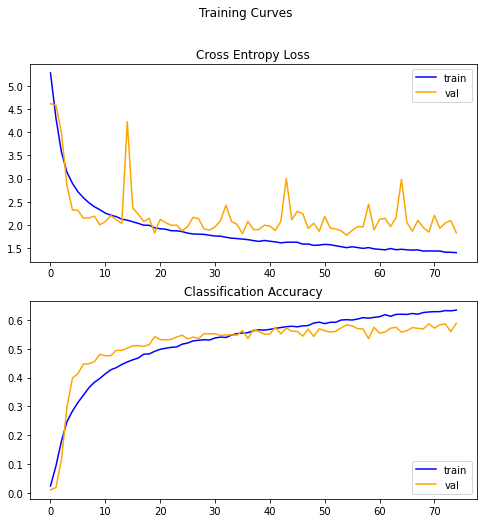


Test set evaluation metrics
30/30 [==============================] - 1s 17ms/step - loss: 1.7515 - accuracy: 0.5956
loss: 1.75
accuracy: 0.60


In [57]:
RESNET_MODEL = init_resnet_model(True)
RESNET_MODEL_history = train_model(RESNET_MODEL, 500, 40, 10)
model_report(RESNET_MODEL, RESNET_MODEL_history, 30)

### Μεταφορά μάθησης: DenseNet

In [58]:
def init_DenseNet_model(summary):
    DenseNet_MODEL=tf.keras.applications.densenet.DenseNet121(input_shape=(img_rows, img_cols, img_channels),
                                                              include_top=False,
                                                              weights='imagenet')
    # unfreeze conv layers
    DenseNet_MODEL.trainable = True

    dropout_layer = tf.keras.layers.Dropout(rate=0.5)
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dropout_layer.trainable = True
    global_average_layer.trainable = True
    
    # add top layer for CIFAR100 classification
    prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST), activation='softmax')
    model = tf.keras.Sequential([DenseNet_MODEL, dropout_layer, global_average_layer, prediction_layer])

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=["accuracy"])
    if summary: model.summary()
    return model

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1, 1, 1024)        7037504   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 1, 1024)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               102500    
Total params: 7,140,004
Trainable params: 7,056,356
Non-trainable params: 83,648
_________________________________________________________________
Epoch 1/500
265/265 [==============================] - 35s 91ms/step - loss: 5.1705 - accuracy: 0.0256 - val_loss: 3.9337 - val_accuracy: 0.1663
Epoch 2/500
265/265 [======

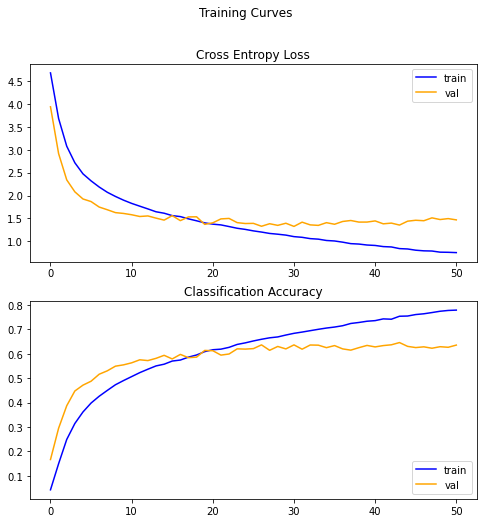


Test set evaluation metrics
30/30 [==============================] - 1s 17ms/step - loss: 1.3340 - accuracy: 0.6357
loss: 1.33
accuracy: 0.64


In [59]:
DenseNet_MODEL = init_DenseNet_model(summary = True)
DenseNet_MODEL_history = train_model(DenseNet_MODEL, 500, 30, 5)
model_report(DenseNet_MODEL, DenseNet_MODEL_history, 30)

## Σύγκριση ακρίβειας μοντέλων

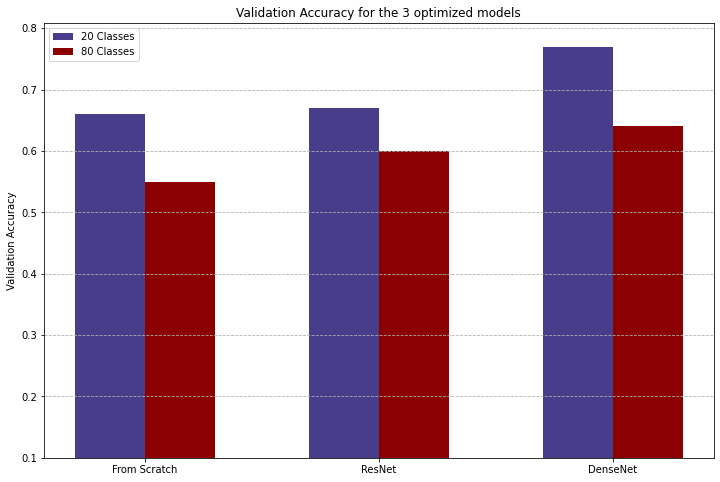

In [62]:
plt.figure(figsize=(12,8))

barWidth = 0.30
models = ['From Scratch', 'ResNet', 'DenseNet']

twenty = [0.66, 0.67, 0.77]
eighty = [0.55, 0.60, 0.64]

r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

plt.bar(r1, twenty, color='darkslateblue', width=barWidth, label='20 Classes')
plt.bar(r2, eighty, color='darkred', width=barWidth, label='80 Classes')
plt.xticks([r + barWidth/2 for r in range(3)], models)
plt.ylim(bottom=0.1)
plt.title("Validation Accuracy for the 3 optimized models")
plt.ylabel("Validation Accuracy")
plt.legend(loc=2)
plt.grid(axis="y", linestyle="--")

plt.savefig('./models.png')
plt.show()